# Final Project: Introduction to Neuroscience

## Creating and Testing a Hamming Net on Binary Images Representing Letters
### writen by Neriya Filber and Harel Weinberg

### Project Description

This project involves creating a Hamming Net and testing it on binary images that represent letters. The goal is to evaluate the stability of the model's accuracy across different noise levels. The Hamming Net is a type of neural network that uses the Hamming distance to compare binary vectors and make predictions based on the closest match. In this project, we will use predefined binary vectors for letters A-Z and introduce noise to these vectors to simulate different levels of distortion. By testing the model's performance under varying noise conditions, we can assess its robustness and accuracy. 

### Objectives

- Develop a Hamming Net to recognize binary images of letters.
- Test the model's performance under various noise levels.
- Visualize the accuracy of the model over multiple iterations.

### Methodology

1. **Data Preparation**: Create binary vectors for each letter (A-Z).
2. **Model Development**: Implement the Hamming Net to calculate match scores and predict letters.
3. **Noise Simulation**: Introduce noise to the binary vectors and evaluate the model's performance.
4. **Visualization**: Plot the accuracy of the model over iterations for different noise levels.

### Results

The results will be presented in a bar plot and a line plot:
- **Bar Plot**: Shows the average accuracy for each noise level.
- **Line Plot**: Displays the accuracy over iterations for each noise level.

### Conclusion

The project aims to demonstrate the robustness of the Hamming Net in recognizing letters under varying noise conditions. The visualizations will help in understanding the model's stability and performance.

* **important to note that the code generated random noise for random letters and the results will be different each time the code is run**
---



### Step 1: Data Preparation
create rew data, save it to csv file and display the image of the letter

Dataset created and saved to 64_bit_vectors_for_letters.csv
Displaying letter: A


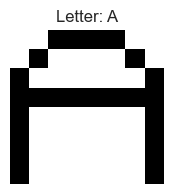

Displaying letter: B


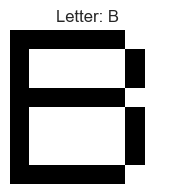

Displaying letter: C


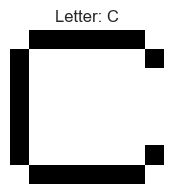

Displaying letter: D


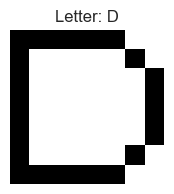

Displaying letter: E


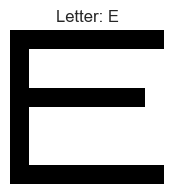

Displaying letter: F


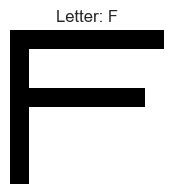

Displaying letter: G


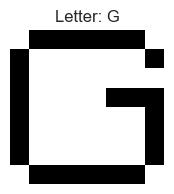

Displaying letter: H


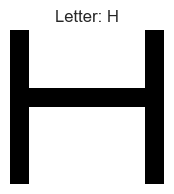

Displaying letter: I


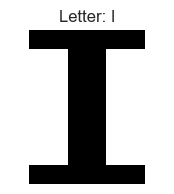

Displaying letter: J


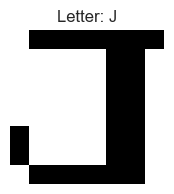

Displaying letter: K


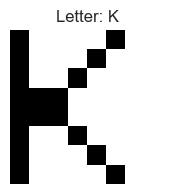

Displaying letter: L


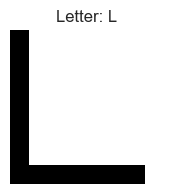

Displaying letter: M


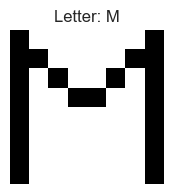

Displaying letter: N


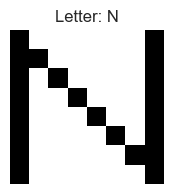

Displaying letter: O


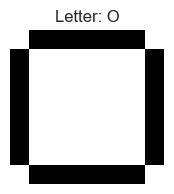

Displaying letter: P


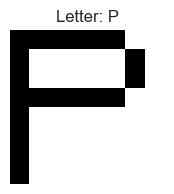

Displaying letter: Q


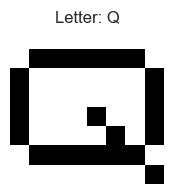

Displaying letter: R


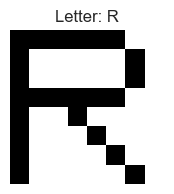

Displaying letter: S


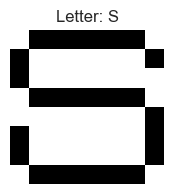

Displaying letter: T


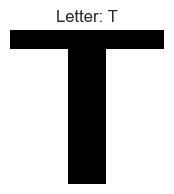

Displaying letter: U


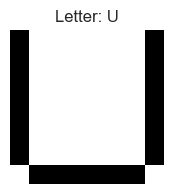

Displaying letter: V


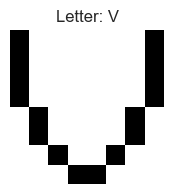

Displaying letter: W


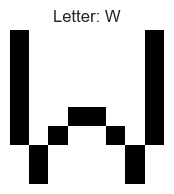

Displaying letter: X


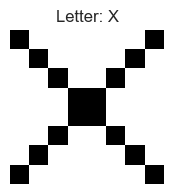

Displaying letter: Y


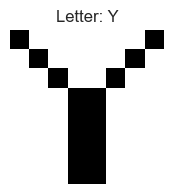

Displaying letter: Z


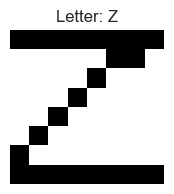

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dictionary of predefined vectors for letters A-Z
predefined_vectors = {
    "A": [
        0, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1
    ],
    "B": [
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0
    ],
    "C": [
        0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "D": [
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0
    ],
    "E": [
        1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1
    ],
    "F": [
        1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0
    ],
    "G": [
        0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "H": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1
    ],
    "I": [
        0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "J": [
        0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "K": [
        1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0
    ],
    "L": [
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0
    ],
    "M": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1
    ],
    "N": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1
    ],
    "O": [
        0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "P": [
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0
    ],
    "Q": [
        0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1
    ],
    "R": [
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0
    ],
    "S": [
        0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "T": [
        1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0
    ],
    "U": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0
    ],
    "V": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0
    ],
    "W": [
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0
    ],
    "X": [
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1
    ],
    "Y": [
        1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0
    ],
    "Z": [
        1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1
    ]
}

# Create a dictionary for letters A-Z with vectors
data = {
    "Letter": [],
    "64-Bit Vector": []
}

for letter, vector in predefined_vectors.items():
    data["Letter"].append(letter)
    data["64-Bit Vector"].append("".join(map(str, vector)))

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the result to a CSV file
csv_filename = "64_bit_vectors_for_letters.csv"
df.to_csv(csv_filename, index=False)

print(f"Dataset created and saved to {csv_filename}")

# Function to read a vector and display the image
def display_letter_image(letter, vector):
    """
    Convert a binary vector to a 8x8 grid and display it as an image.

    Parameters:
    letter (str): The letter to display.
    vector (str): The 64-bit binary vector representing the letter.
    """
    #convert the string to a list of integers and reshape it to 8x8
    bit_array = np.array(list(map(int, vector))).reshape(8, 8)

    # Display the image
    plt.figure(figsize=(2, 2))
    plt.imshow(bit_array, cmap="binary")
    plt.title(f"Letter: {letter}")
    plt.axis("off")
    plt.show()


# Read the file and display an image for a specific letter
def display_from_csv(csv_filename, letter_to_display):
    """
    Read a CSV file and display the image of a specific letter.

    Parameters:
    csv_filename (str): The name of the CSV file.
    letter_to_display (str): The letter to display.
    """
    df = pd.read_csv(csv_filename)
    row = df[df["Letter"] == letter_to_display]
    if not row.empty:
        vector = row.iloc[0]["64-Bit Vector"]
        display_letter_image(letter_to_display, vector)
    else:
        print(f"Letter {letter_to_display} not found in the dataset.")


# Example to display an image for a specific letter
# display_from_csv(csv_filename, "Q")
# For loop to display all letters in the dictionary
for letter, vector in predefined_vectors.items():
    print(f"Displaying letter: {letter}")
    display_letter_image(letter, "".join(map(str, vector)))

create the data as dictionary and save it in variable to simple use

In [88]:
# Templates (provided data)
templates = {
    "A": "0011110001000010100000011111111110000001100000011000000110000001",
    "B": "1111110010000010100000101111110010000010100000101000001011111100",
    "C": "0111111010000001100000001000000010000000100000001000000101111110",
    "D": "1111110010000010100000011000000110000001100000011000001011111100",
    "E": "1111111110000000100000001111111010000000100000001000000011111111",
    "F": "1111111110000000100000001111111010000000100000001000000010000000",
    "G": "0111111010000001100000001000011110000001100000011000000101111110",
    "H": "1000000110000001100000011111111110000001100000011000000110000001",
    "I": "0111111000011000000110000001100000011000000110000001100001111110",
    "J": "0111111100000110000001100000011000000110100001101000011001111110",
    "K": "1000010010001000100100001110000011100000100100001000100010000100",
    "L": "1000000010000000100000001000000010000000100000001000000011111110",
    "M": "1000000111000011101001011001100110000001100000011000000110000001",
    "N": "1000000111000001101000011001000110001001100001011000001110000001",
    "O": "0111111010000001100000011000000110000001100000011000000101111110",
    "P": "1111110010000010100000101111110010000000100000001000000010000000",
    "Q": "0000000001111110100000011000000110001001100001010111111000000001",
    "R": "1111110010000010100000101111110010010000100010001000010010000010",
    "S": "0111111010000001100000000111111000000001100000011000000101111110",
    "T": "1111111100011000000110000001100000011000000110000001100000011000",
    "U": "1000000110000001100000011000000110000001100000011000000101111110",
    "V": "1000000110000001100000011000000101000010010000100010010000011000",
    "W": "1000000110000001100000011000000110011001101001010100001001000010",
    "X": "1000000101000010001001000001100000011000001001000100001010000001",
    "Y": "1000000101000010001001000001100000011000000110000001100000011000",
    "Z": "1111111100000110000010000001000000100000010000001000000011111111",
}

### Step 2: Implement the Hamming Net


In [89]:
import numpy as np

class HammingNet:
    def __init__(self, templates):
        """
        Initialize the Hamming Net.
        :param templates: Dictionary of templates (binary vectors).
        """
        self.templates = {key: np.array(list(map(int, value))) for key, value in templates.items()}
    def hamming_distance(self, x, w):
        """
        Calculate the Hamming distance between two binary vectors.
        :param x: Input vector.
        :param w: Template vector.
        :return: Hamming distance.
        """
        return np.sum(np.abs(x - w))

    def match_score(self, x, w):
        """
        Calculate the match score between an input vector and a template.
        :param x: Input vector.
        :param w: Template vector.
        :return: Match score.
        """
        return len(x) - self.hamming_distance(x, w)

    def predict(self, x):
        """
        Predict the class for an input vector.
        :param x: Input vector.
        :return: Key of the best-matching template.
        """
        x = np.array(list(map(int, x)))  # Convert input to binary vector
        scores = {key: self.match_score(x, w) for key, w in self.templates.items()}
        return max(scores, key=scores.get)





# Create the Hamming Net
net = HammingNet(templates=templates)




### Step 3: Test the Hamming Net
create a function to test the model with different noise levels.
The noise level is randomize from an original random letter and replace a random number of bits with the opposite value.

In [90]:
import random
def modify_dict_with_percentage(input_dict, percentage):
    """
    Modifies a dictionary by randomly selecting a key and changing its value.

    Parameters:
        input_dict (dict): A dictionary where values are binary strings.
        percentage (float): The percentage of characters to change in the binary string values.

    Returns:
        tuple: A tuple containing the modified dictionary and the modified string.
    """
    if not input_dict:
        raise ValueError("The input dictionary cannot be empty.")

    if not (0 <= percentage <= 100):
        raise ValueError("Percentage must be between 0 and 100.")

    modified_dict = input_dict.copy()
    keys = list(modified_dict.keys())
    random_key = random.choice(keys)
    original_value = modified_dict[random_key]

    if not isinstance(original_value, str) or not set(original_value).issubset({'0', '1'}):
        raise ValueError("All values in the dictionary must be binary strings.")

    total_chars = len(original_value)
    num_to_change = int(total_chars * (percentage / 100))

    # Get indices to change
    indices = list(range(total_chars))
    random.shuffle(indices)
    indices_to_change = indices[:num_to_change]

    # Flip the bits at the selected indices
    input_list = list(original_value)
    for idx in indices_to_change:
        input_list[idx] = '1' if input_list[idx] == '0' else '0'

    updated_value = ''.join(input_list)

    return updated_value , random_key

In [91]:
def pred(number_of_iter, percentage ,my_dict):
    """
    Predict the accuracy of the Hamming Net over a number of iterations with a given noise percentage.

    Parameters:
    number_of_iter (int): Number of iterations to run the prediction.
    percentage (float): The percentage of noise to introduce in the binary vectors.

    Returns:
    float: The average accuracy of the model.
    """
    test_data = []
    test_labels = []
    for i in range(number_of_iter):
        modify_str , key = modify_dict_with_percentage(my_dict,percentage)
        test_data.append(modify_str)
        test_labels.append(key)
    total_score = 0
    for i in range(len(test_data)):
        predicted_letter = net.predict(test_data[i])
        if test_labels[i] == predicted_letter:
            total_score += 1
        #optins to print the prediction and the image after the changes.
        # print(f"Predicted letter: {predicted_letter}")
        # display_letter_image(test_labels[i], test_data[i])
    
    # print(f"Total score: {total_score/len(test_data)}")
    return total_score/len(test_data)

### Step 4: Evaluate the Model
We first add templates to run model on each noise level separately.

In [ ]:
# sum_iter0 = 0
# num_of_iter0 = 10000
# percentage0 = 0
#
# for i in range(num_of_iter1):
#     sum_iter0 += pred(1000, percentage1, templates)
#
# print(f"avarge score for {percentage0}% of data noise is {sum_iter0/num_of_iter0}")

In [92]:
# sum_iter1 = 0
# num_of_iter1 = 10000
# percentage1 = 5
# 
# for i in range(num_of_iter1):
#     sum_iter1 += pred(1000, percentage1, templates)
#     
# print(f"avarge score for {percentage1}% of data noise is {sum_iter1/num_of_iter1}")

In [93]:
# sum_iter2 = 0
# num_of_iter2 = 10000
# percentage2 = 10
# 
# for i in range(num_of_iter2):
#     sum_iter2 += pred(1000, percentage2, templates)
#     
# print(f"avarge score for {percentage2}% of data noise is {sum_iter2/num_of_iter2}")

In [94]:
# sum_iter3 = 0
# num_of_iter3 = 10000
# percentage3 = 15
# 
# for i in range(num_of_iter3):
#     sum_iter3 += pred(1000, percentage3, templates)
#     
# print(f"avarge score for {percentage3}% of data noise is {sum_iter3/num_of_iter3}")

In [95]:
# sum_iter4 = 0
# num_of_iter4 = 10000
# percentage4 = 20
# 
# for i in range(num_of_iter4):
#     sum_iter4 += pred(1000, percentage4, templates)
#     
# print(f"avarge score for {percentage4}% of data noise is {sum_iter4/num_of_iter4}")

In [96]:
# sum_iter5 = 0
# num_of_iter5 = 10000
# percentage5 = 25
# 
# for i in range(num_of_iter5):
#     sum_iter5 += pred(1000, percentage5, templates)
#     
# print(f"avarge score for {percentage5}% of data noise is {sum_iter5/num_of_iter5}")

In [97]:
# sum_iter6 = 0
# num_of_iter6 = 10000
# percentage6 = 30
# 
# for i in range(num_of_iter6):
#     sum_iter6 += pred(1000, percentage6, templates)
#     
# print(f"avarge score for {percentage6}% of data noise is {sum_iter6/num_of_iter6}")

Run the model prediction with different noise levels and store the results.

In [113]:
# Run model prediction with different noise levels
noise_levels = [0,5, 10, 15, 20, 25, 30]
results = []
num_of_iter = 10000000

# run 10,000,0000 samples iteration for each noise level and store the average score.
for percentage in noise_levels:
    avg_score = pred(num_of_iter, percentage, templates)
    results.append((percentage, avg_score))

# Print results
for percentage, avg_score in results:
    print(f"Average score for {percentage}% of data noise is {avg_score}")

Average score for 0% of data noise is 1.0
Average score for 5% of data noise is 0.9989166
Average score for 10% of data noise is 0.9934248
Average score for 15% of data noise is 0.9800108
Average score for 20% of data noise is 0.9513243
Average score for 25% of data noise is 0.866162
Average score for 30% of data noise is 0.7365857


### Step 5: Visualize the Results

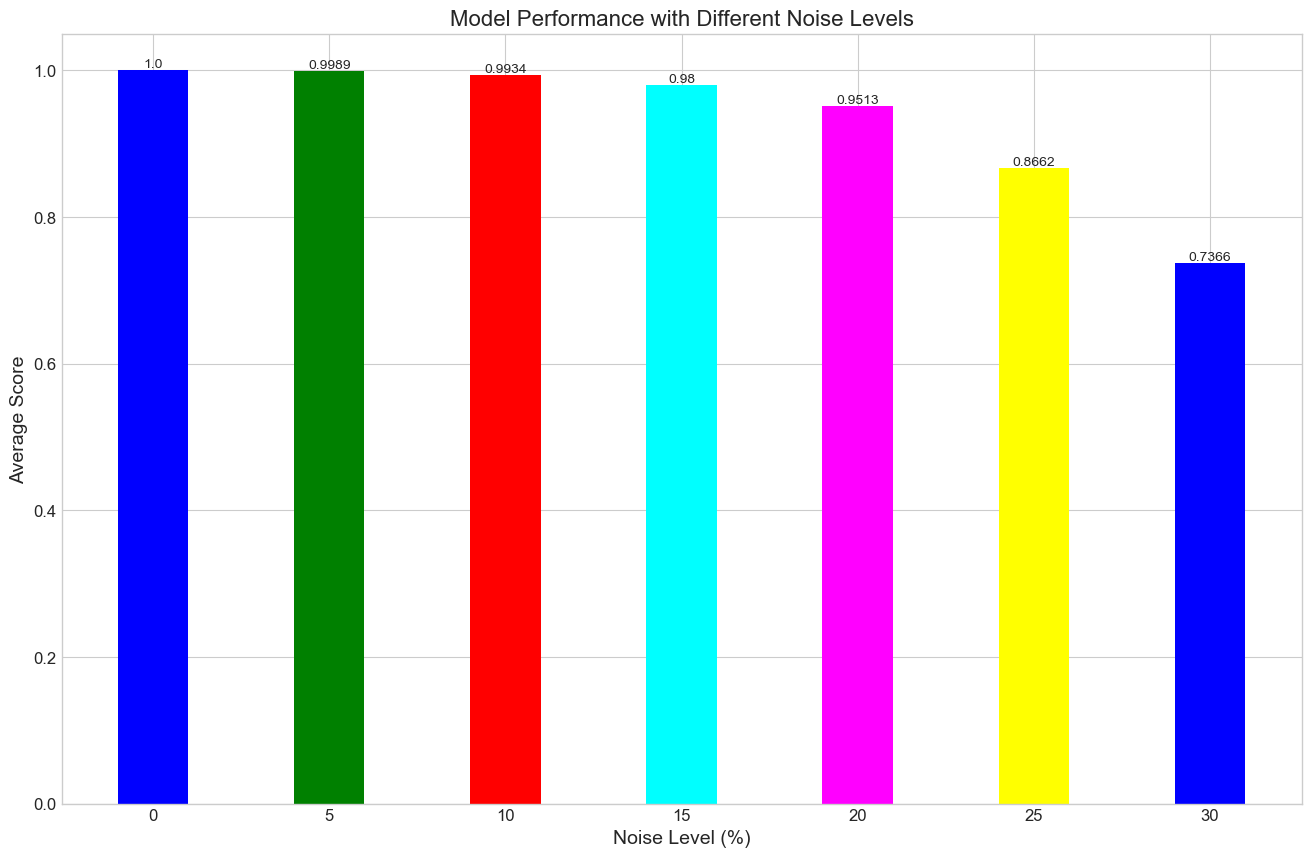

In [114]:
import matplotlib.pyplot as plt

# Set Seaborn style
plt.style.use("seaborn-v0_8-whitegrid")

# Plot results in a bar plot
noise_levels, avg_scores = zip(*results)

plt.figure(figsize=(16, 10))
bars = plt.bar(noise_levels, avg_scores, width=2, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center', fontsize=10)  # Add text on each bar

plt.xlabel('Noise Level (%)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Model Performance with Different Noise Levels', fontsize=16)
plt.grid(True)  # Add grid to the plot

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Plot of the first 1000 iteration with different noise levels, to demonstrate the changes in the accuracy over the first iterations.

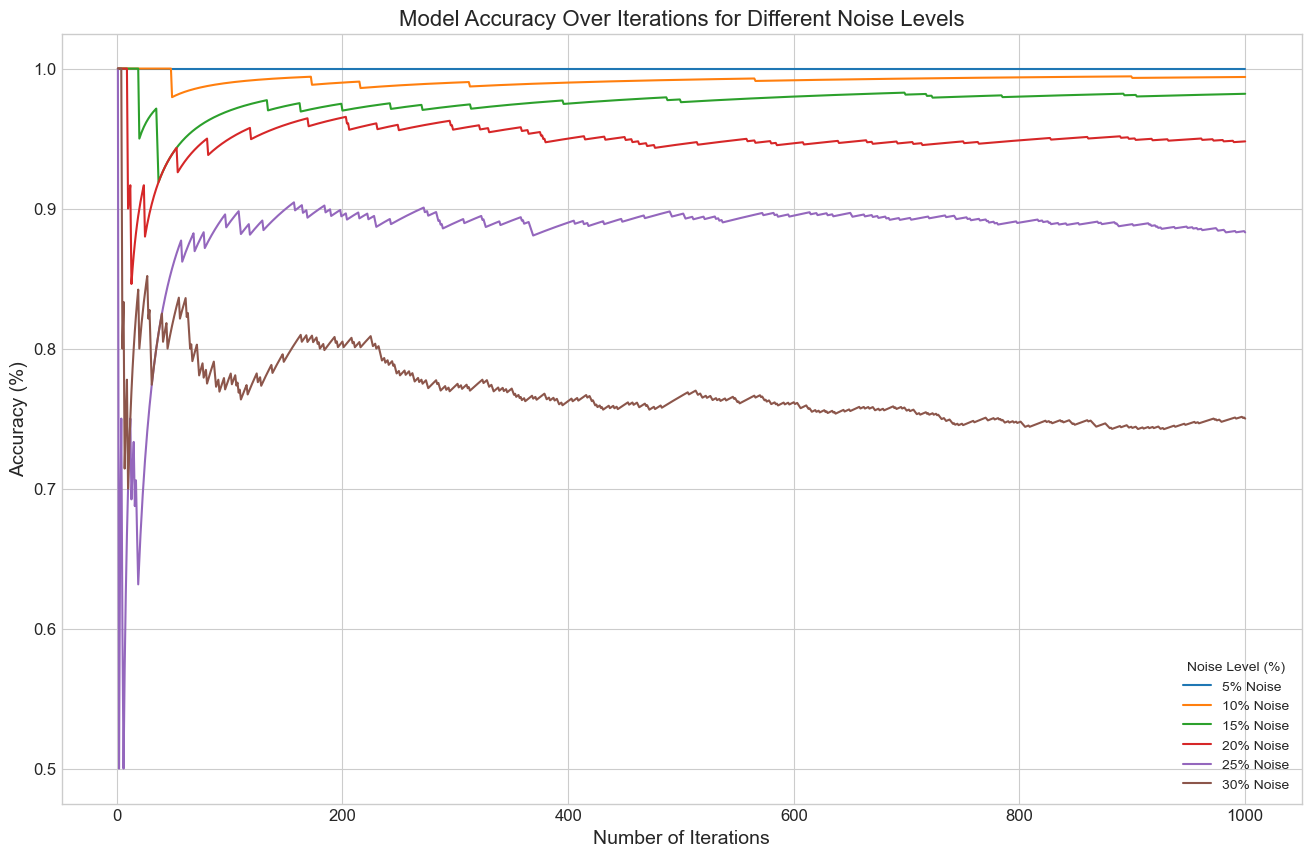

In [110]:
import matplotlib.pyplot as plt

# Define the noise levels and number of iterations
noise_levels = [5, 10, 15, 20, 25, 30]
num_of_iter = 1000

# Initialize a dictionary to store accuracy results for each noise level
accuracy_results = {percentage: [] for percentage in noise_levels}

# Run model prediction for each noise level and store the accuracy
for percentage in noise_levels:
    sum = 0
    for i in range(num_of_iter):
        sum += pred(1, percentage, templates)
        accuracy_results[percentage].append(sum/(i+1))

# Plot the results
plt.figure(figsize=(16, 10))

for percentage, accuracies in accuracy_results.items():
    plt.plot(range(1, num_of_iter + 1), accuracies, label=f'{percentage}% Noise')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)  # Update y-axis label to show percentage
plt.title('Model Accuracy Over Iterations for Different Noise Levels', fontsize=16)
plt.legend(title='Noise Level (%)', loc= 'lower right')
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Plot of the first 100,000 iteration with different noise levels, to demonstrate that accuracy converge over time.

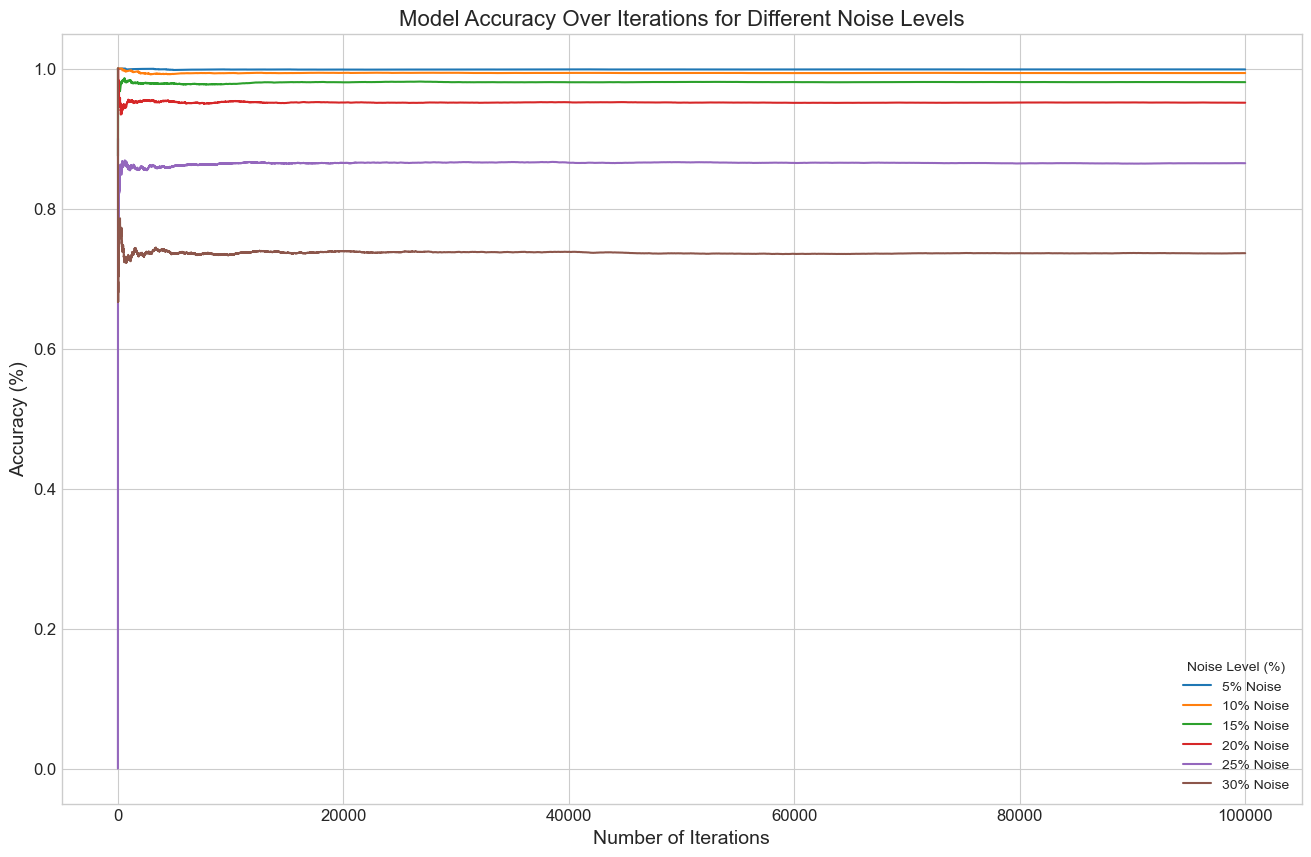

In [112]:
import matplotlib.pyplot as plt

# Define the noise levels and number of iterations
noise_levels = [5, 10, 15, 20, 25, 30]
num_of_iter = 100000

# Initialize a dictionary to store accuracy results for each noise level
accuracy_results = {percentage: [] for percentage in noise_levels}

# Run model prediction for each noise level and store the accuracy
for percentage in noise_levels:
    sum = 0
    for i in range(num_of_iter):
        sum += pred(1, percentage, templates)
        accuracy_results[percentage].append(sum/(i+1))

# Plot the results
plt.figure(figsize=(16, 10))

for percentage, accuracies in accuracy_results.items():
    plt.plot(range(1, num_of_iter + 1), accuracies, label=f'{percentage}% Noise')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)  # Update y-axis label to show percentage
plt.title('Model Accuracy Over Iterations for Different Noise Levels', fontsize=16)
plt.legend(title='Noise Level (%)', loc= 'lower right')
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Visualize the letters after the noise added.

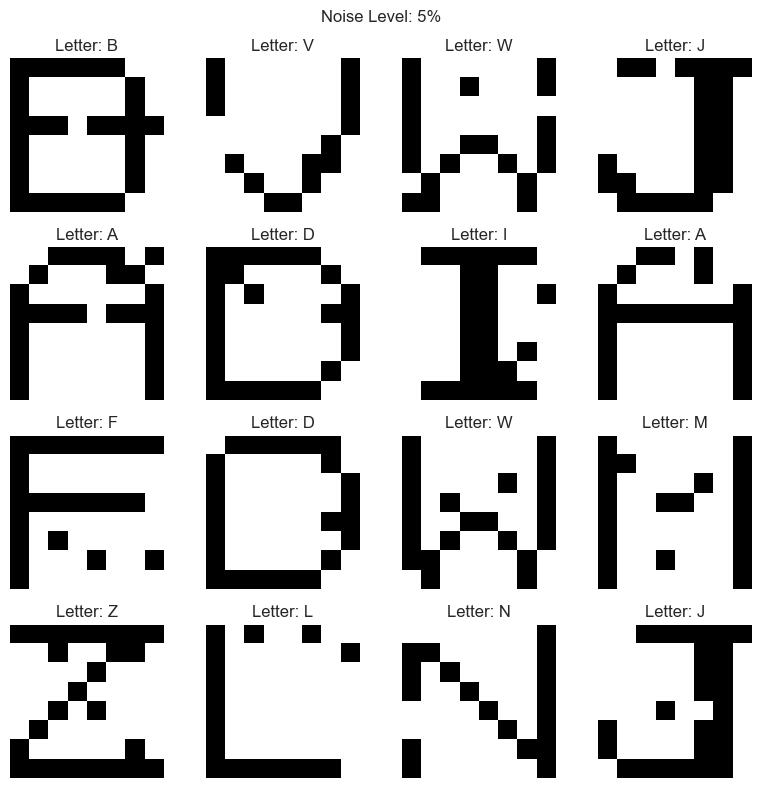

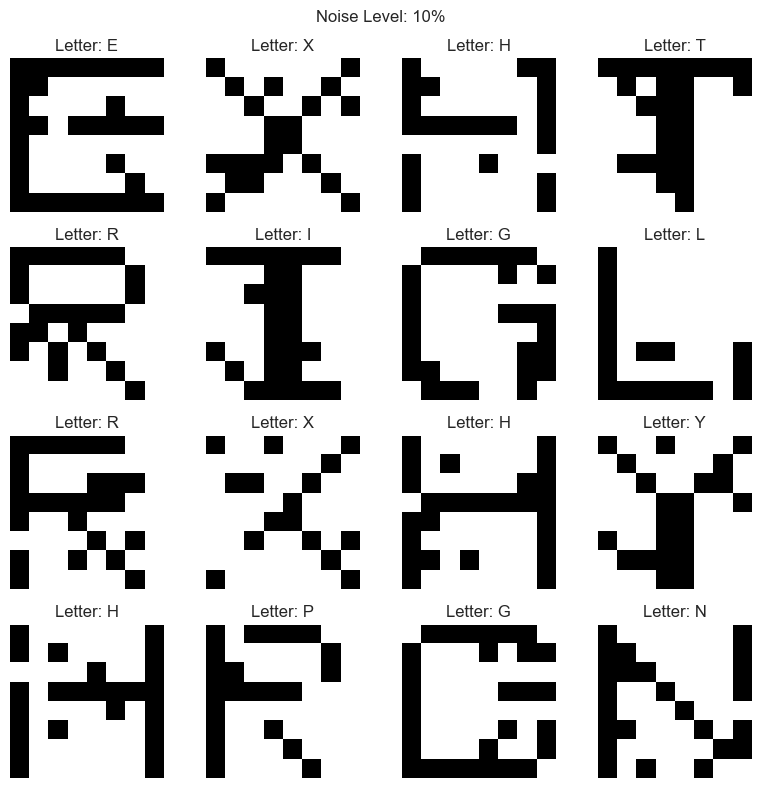

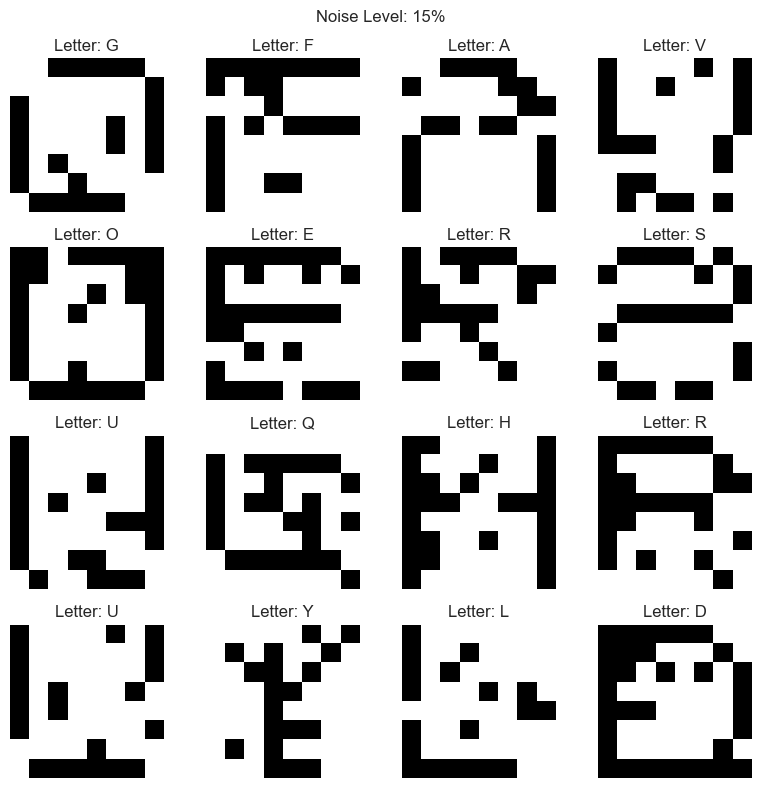

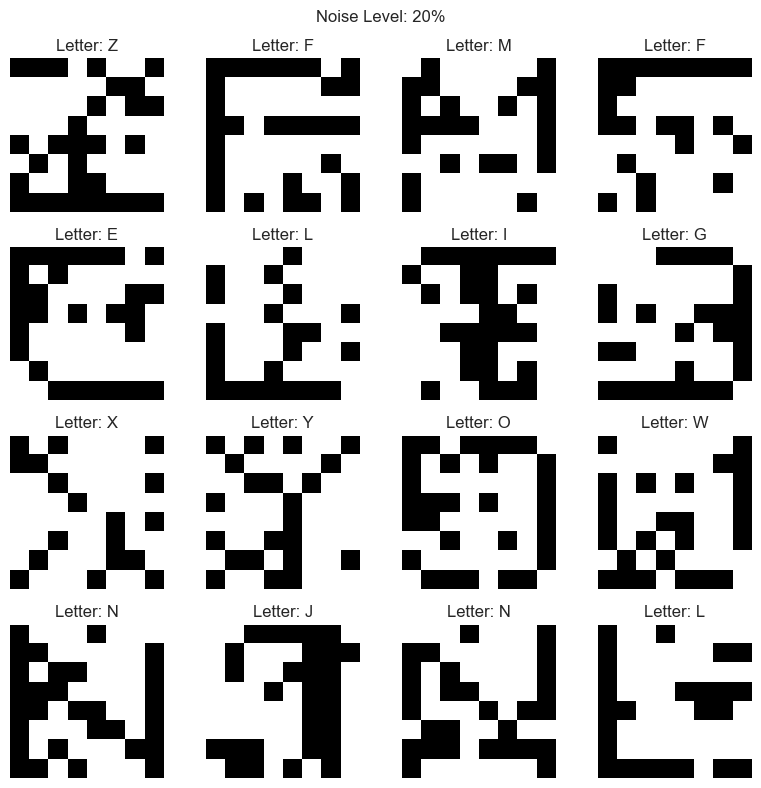

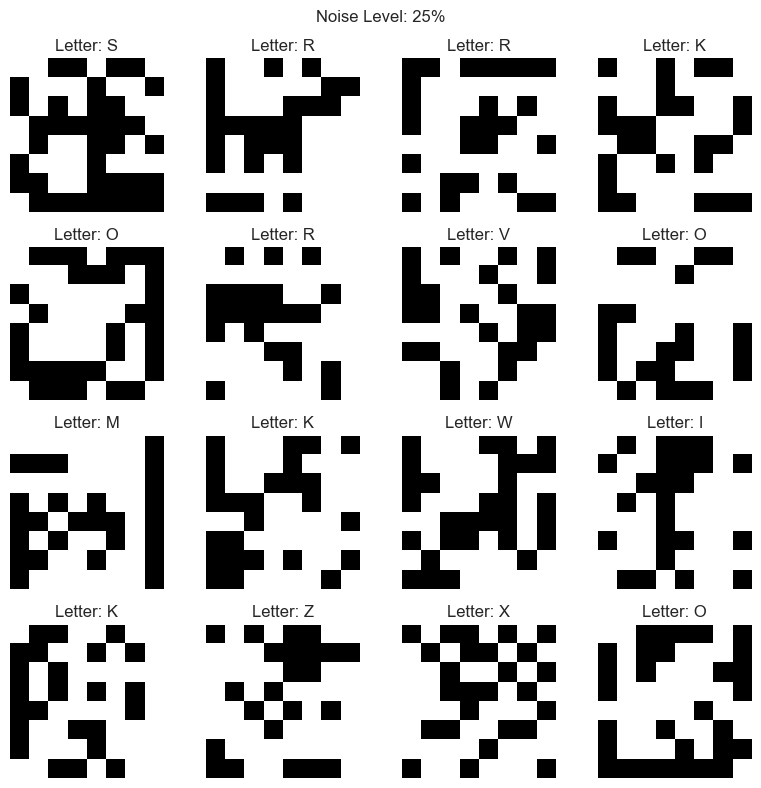

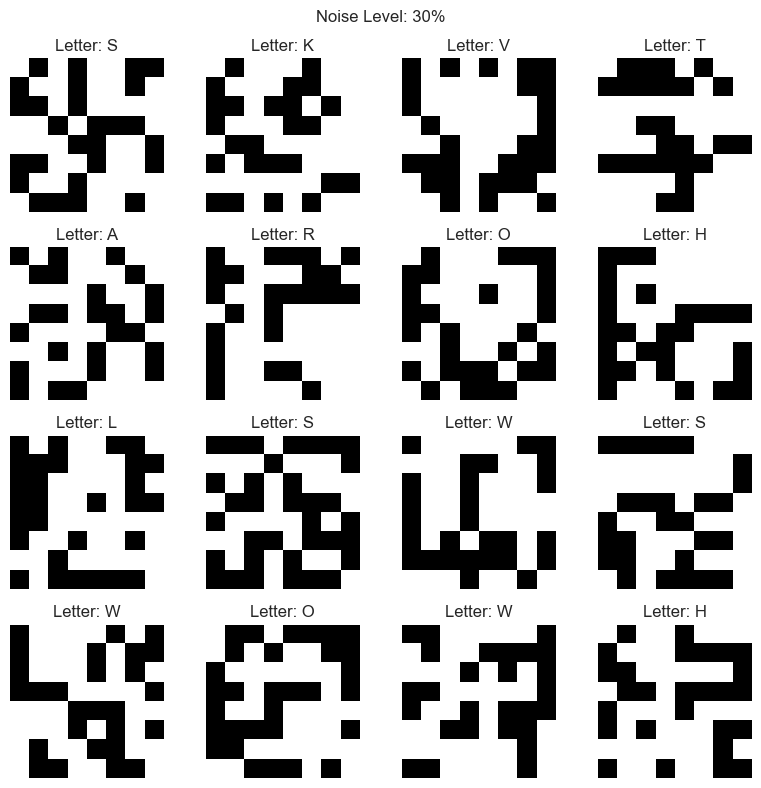

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def display_vectors_in_grid(vectors, noise_level):
    """
    Display a list of binary vectors in a grid.

    Parameters:
    vectors (list of tuples): List of tuples where each tuple contains a letter and its 64-bit binary vector.
    noise_level (int): The noise level to display in the title.
    """
    num_vectors = len(vectors)
    grid_size = int(np.ceil(np.sqrt(num_vectors)))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(8, 8))
    fig.suptitle(f"Noise Level: {noise_level}%")

    for j, (value, key) in enumerate(vectors):
        bit_array = np.array(list(map(int, value))).reshape(8, 8)
        ax = axs[j // grid_size, j % grid_size]
        ax.imshow(bit_array, cmap="binary")
        ax.set_title(f"Letter: {key}")
        ax.axis("off")

    # Hide any unused subplots
    for k in range(j + 1, grid_size * grid_size):
        fig.delaxes(axs[k // grid_size, k % grid_size])

    plt.tight_layout()
    plt.show()


# Example usage
noise_levels = [5, 10, 15, 20, 25, 30]
for i in noise_levels:
    vectors = [modify_dict_with_percentage(templates, i) for _ in range(16)]
    display_vectors_in_grid(vectors, i)

We try to see the effect of different fonts on the model accuracy.

Create new fonts for the model.


the letters created by Itay Segev

In [105]:
letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V",    "W", "X", "Y", "Z"]
def create_letters_vector():
        """
        This method create a vector of vectors of letters.
        :return: the vector of the vectors of letters.
        """
        letters_vector = []
        # A
        letters_vector.append([0, 0, 0, 0, 1, 0, 0, 0,
                               0, 0, 0, 1, 1, 0, 0, 0,
                               0, 0, 1, 0, 0, 1, 0, 0,
                               0, 0, 1, 0, 0, 1,0, 0,
                               0, 1, 1, 1, 1, 1, 1, 0,
                               0, 1, 0, 0, 0, 0, 1, 0,
                               1, 0, 0, 0, 0, 0, 0, 1,
                               1, 0, 0, 0,0, 0, 0, 1])

        # B
        letters_vector.append([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
                               0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
                               1, 1, 0, 0])

        # C
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                               0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
                               1, 1, 1, 0])

        # D
        letters_vector.append([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
                               1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
                               1, 0, 0, 0])

        # E
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                               0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
                               1, 1, 1, 0])

        # F
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                               0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                               0, 0, 0, 0])

        # G
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
                               1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                               1, 1, 1, 0])

        # H
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
                               0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
                               0, 0, 0, 1])

        # I
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                               0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
                               1, 1, 1, 0])

        # J
        letters_vector.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                               0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                               0, 0, 1, 0])

        # K
        letters_vector.append([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                               0, 0, 0, 1])
        # L
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                               0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
                               1, 1, 1, 0])

        # M
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
                               0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
                               1, 0, 0, 1])

        # N
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
                               0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                               1, 0, 0, 1])

        # O
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                               0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
                               1, 1, 1, 0])

        # P
        letters_vector.append([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
                               0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                               0, 0, 0, 0])

        # Q
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                               0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
                               1, 1, 0, 1])

        # R
        letters_vector.append([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
                               0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
                               0, 0, 0, 1])

        # S
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                               0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
                               1, 0, 0, 0])

        # T
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                               0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
                               1, 1, 1, 0])

        # U
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                               0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
                               1, 1, 1, 0])

        # V
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
                               1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                               0, 1, 1, 0])

        # W
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
                               1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
                               0, 1, 0, 0])

        # X
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
                               0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
                               0, 0, 0, 1])

        # Y
        letters_vector.append([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
                               0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                               0, 1, 1, 0])

        # Z
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                               0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 1, 1])



        return letters_vector
def create_bold_letters_vector():
        """
        This method create a vector of vectors of the letters in bold
        :return:  the vector of the vectors of letters in bold.
        """
        letters_vector = []
        # A
        letters_vector.append([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
                               0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1])

        # B
        letters_vector.append([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
                               1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
                               1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # C
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # D
        letters_vector.append([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # E
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

        # F
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # G
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # H
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

        # I
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

        # J
        letters_vector.append([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
                               0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
                               1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # K
        letters_vector.append([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
                               1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
                               1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # L
        letters_vector.append([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

        # M
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                               1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

        # N
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
                               1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

        # O
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # P
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                               1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # Q
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

        # R
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
                               1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

        # S
        letters_vector.append([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
                               0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # T
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

        # U
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

        # V
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

        # W
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                               1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                               1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

        # X
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                               0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

        # Y
        letters_vector.append([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
                               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
                               0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

        # Z
        letters_vector.append([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
                               0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                               1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

        return letters_vector

def create_letters_v3_vector():
        """
        This method create the letters vector of letters that they are bold and circle
        :return: the letters vector
        """
        letters_vector = []

        # A
        letters_vector.append(
            [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # B
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # C
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
             1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # D
        letters_vector.append(
            [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

        # E
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
             1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

        # F
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
             1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # G
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # H
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # I
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
             0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # J
        letters_vector.append(
            [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
             1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

        # K
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
             1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # L
        letters_vector.append(
            [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
             1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

        # M
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # N
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
             1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # O
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # P
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
             1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # Q
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

        # R
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
             1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # S
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
             0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # T
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
             0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

        # U
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # V
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

        # W
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
             1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # X
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # Y
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
             0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

        # Z
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
             0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])
        return letters_vector

def create_letters_v4_vector():
        """
        This method creates a vector of letters that they are extra bold and circle
        :return: the vector of letters
        """
        letters_vector = []

        # A
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
             1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # B
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
             1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # C
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
             0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # D
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # E
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
             1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

        # F
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
             1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # G
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # H
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
             1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # I
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
             1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

        # J
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
             1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

        # K
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
             0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # L
        letters_vector.append(
            [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
             0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

        # M
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # N
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
             1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # O
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # P
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
             1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

        # Q
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
             0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

        # R
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
             1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # S
        letters_vector.append(
            [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
             1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

        # T
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
             1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

        # U
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

        # V
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
             0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

        # W
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
             0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

        # X
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
             1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

        # Y
        letters_vector.append(
            [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
             1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

        # Z
        letters_vector.append(
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
             0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])
        return letters_vector

Display the letters in a plot (each block is different font)

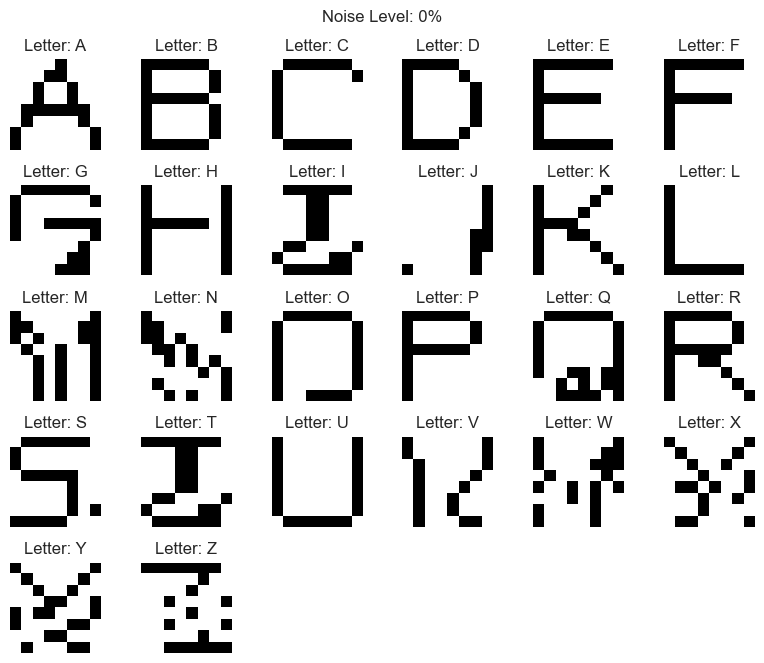

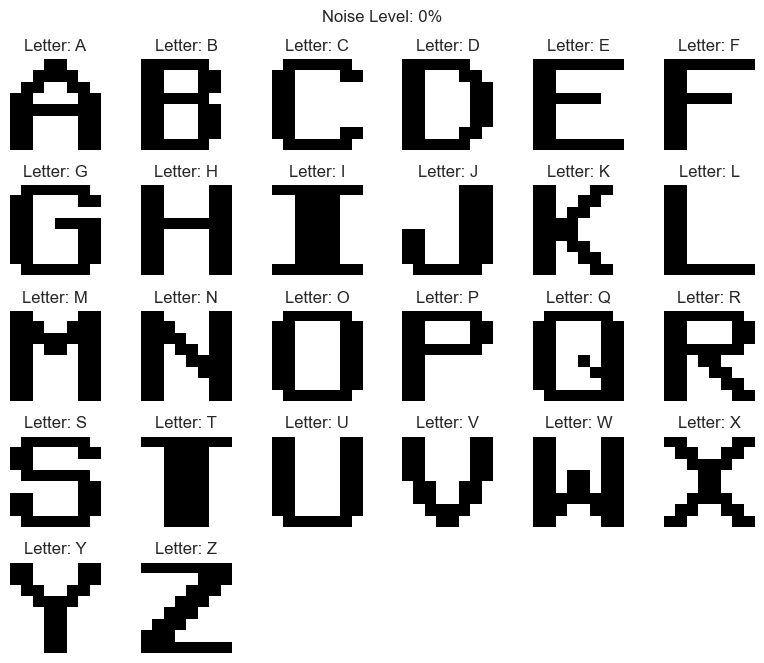

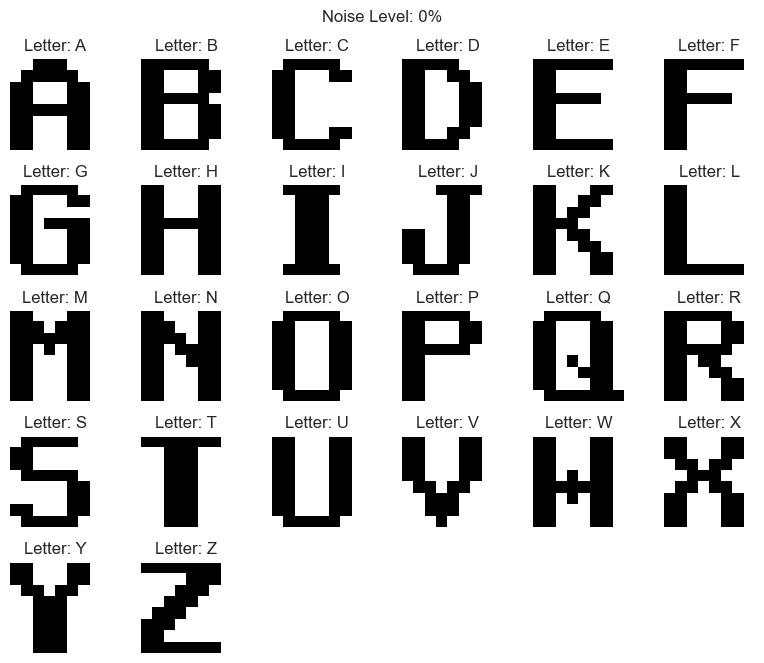

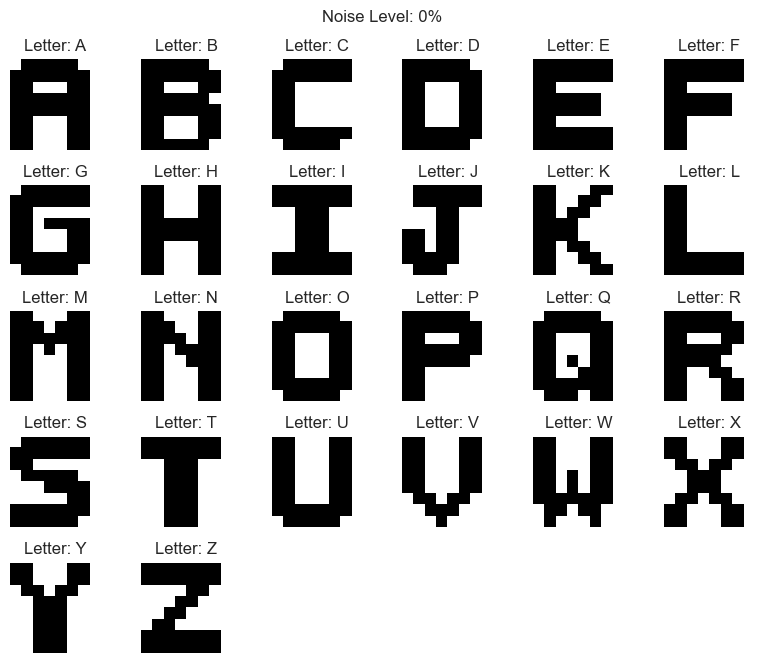

In [106]:
res = [(vector, letter) for vector, letter in zip(create_letters_vector(), letters)]
display_vectors_in_grid(res,0)
res = [(vector, letter) for vector, letter in zip(create_bold_letters_vector(), letters)]
display_vectors_in_grid(res,0)
res = [(vector, letter) for vector, letter in zip(create_letters_v3_vector(), letters)]
display_vectors_in_grid(res,0)
res = [(vector, letter) for vector, letter in zip(create_letters_v4_vector(), letters)]
display_vectors_in_grid(res,0)


predict the model with different fonts and calculate the accuracy of the model for each font

In [107]:
font1 = dict(zip(letters, create_letters_vector()))
font2 = dict(zip(letters, create_bold_letters_vector()))
font3 = dict(zip(letters, create_letters_v3_vector()))
font4 = dict(zip(letters, create_letters_v4_vector()))
fonts = [font1, font2, font3, font4]
fonts_name = ['font 1', 'font 2', 'font 3', 'font 4']
font_results = []
for j, font in enumerate(fonts):
    sum = 0
    font_values = list(font.values())
    font_keys = list(font.keys())
    for i in range(len(font_values)):
        predicted_letter = net.predict(font_values[i])
        # print(predicted_letter)
        if predicted_letter == font_keys[i]:
            sum += 1
    font_results.append((fonts_name[j],sum / len(font_keys)))
# print(font_results)


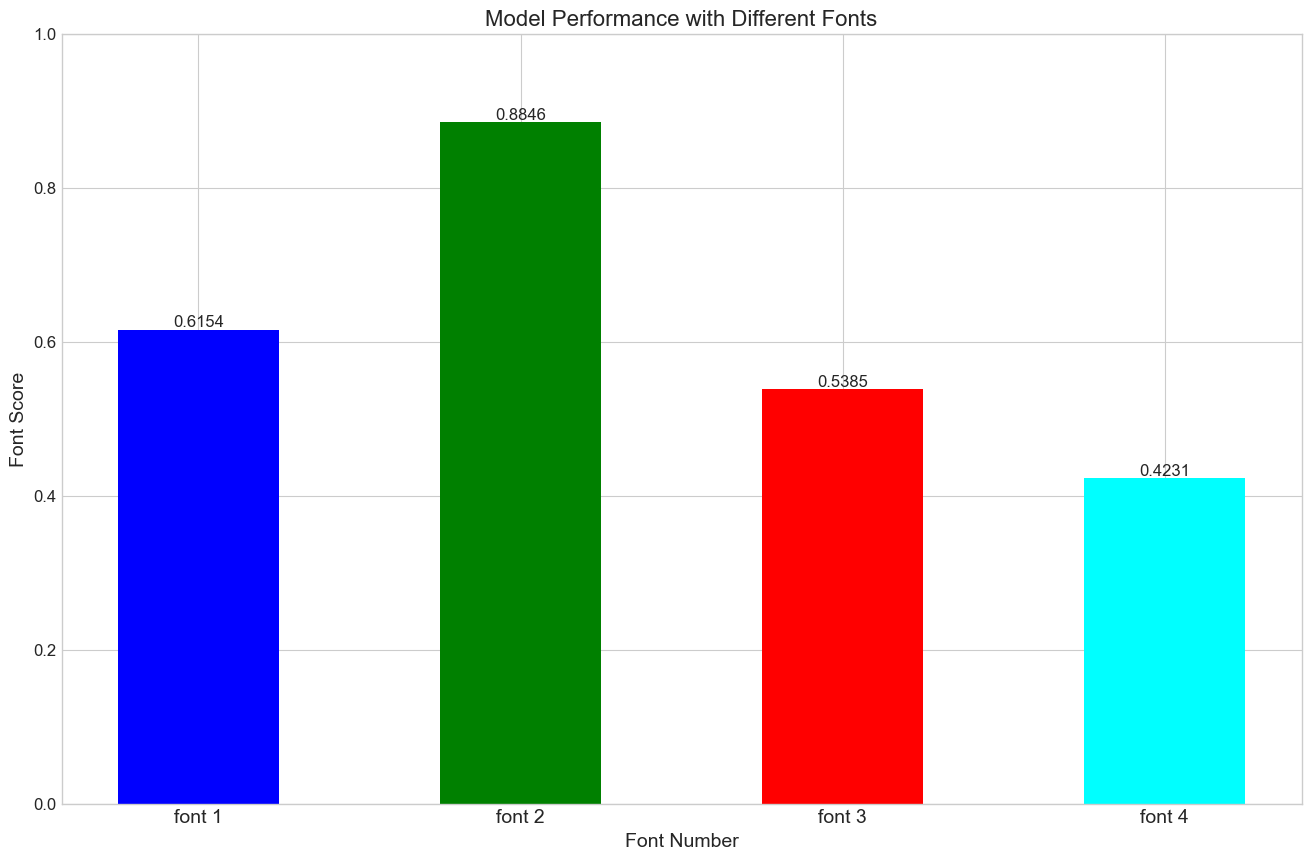

In [108]:
import matplotlib.pyplot as plt

# Set Seaborn style
plt.style.use("seaborn-v0_8-whitegrid")

# Plot results in a bar plot
font, font_accuracy = zip(*font_results)

plt.figure(figsize=(16, 10))
bars = plt.bar(font, font_accuracy, width=0.5, color=['blue', 'green', 'red', 'cyan'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center', fontsize=12)  # Add text on each bar

plt.xlabel('Font Number', fontsize=14)
plt.ylabel('Font Score', fontsize=14)
plt.title('Model Performance with Different Fonts', fontsize=16)
plt.ylim(0,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

plt.show()

Check if noise level affects the model performance with different fonts:

In [109]:
# Convert integer vectors to binary strings
def convert_to_binary_string(font):
    binary_font = {}
    for letter, vector in font.items():
        binary_font[letter] = ''.join(map(str, vector))
    return binary_font

# Convert all fonts to binary strings
binary_fonts = [convert_to_binary_string(font) for font in fonts]

# Run model prediction with different noise levels
noise_levels = [5, 10, 15, 20, 25, 30]
results_fonts = []
num_of_iter_fonts = 1
for i in range(len(binary_fonts)):
    font_res = []
    for percentage in noise_levels:
        avg_score= pred(1000, percentage, binary_fonts[i])
        font_res.append((percentage, avg_score))
        print(f"Average score for {percentage}% of data noise is {avg_score}, for font {fonts_name[i]}")
    results_fonts.append(font_res)


Average score for 5% of data noise is 0.584, for font font 1
Average score for 10% of data noise is 0.536, for font font 1
Average score for 15% of data noise is 0.513, for font font 1
Average score for 20% of data noise is 0.474, for font font 1
Average score for 25% of data noise is 0.343, for font font 1
Average score for 30% of data noise is 0.3, for font font 1
Average score for 5% of data noise is 0.887, for font font 2
Average score for 10% of data noise is 0.831, for font font 2
Average score for 15% of data noise is 0.763, for font font 2
Average score for 20% of data noise is 0.69, for font font 2
Average score for 25% of data noise is 0.554, for font font 2
Average score for 30% of data noise is 0.403, for font font 2
Average score for 5% of data noise is 0.469, for font font 3
Average score for 10% of data noise is 0.474, for font font 3
Average score for 15% of data noise is 0.411, for font font 3
Average score for 20% of data noise is 0.365, for font font 3
Average score 